# Aprendizaje automático y aplicaciones

---
$A^3$ @ FI-UNER : 2021

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div style='background-color:#51B91A;padding:10px'>
<h1 style='color:#000000'><b>Series temporales</b></h1>
</div>

Manejo de fechas a mano

https://towardsdatascience.com/time-series-from-scratch-introduction-to-time-series-with-pandas-347ac9c6b451

https://towardsdatascience.com/every-pandas-function-you-can-should-use-to-manipulate-time-series-711cb0c5c749

## MANEJO DE FECHAS CON **DATETIME**

In [2]:
from datetime import datetime, timedelta

# Arbitrary date
print('Arbitrary date: ', end=' ')
print(datetime(year=2021, month=5, day=15))

# Arbitary date and time
print('Date and time:  ', end=' ')
print(datetime(year=2021, month=5, day=15, hour=7, minute=23, second=44))

# Now
print('Date right now: ', end=' ')
print(datetime.now())

# Yesterday
print('Date yesterday: ', end=' ')
print(datetime.now() - timedelta(days=1))

Arbitrary date:  2021-05-15 00:00:00
Date and time:   2021-05-15 07:23:44
Date right now:  2021-08-12 17:48:16.067171
Date yesterday:  2021-08-11 17:48:16.067319


## MANEJO DE FECHAS CON **NUMPY**
Numpy allows you to specify date ranges as an array of strings, followed by a data type specification — datetime64. Here’s an example:

In [3]:
date_list = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64')
date_list_D = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[D]')
date_list_s = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[s]')
date_list_Y = np.array(['2021-07-01', '2021-07-02', '2021-07-03'], dtype='datetime64[Y]')

print(date_list)
print(date_list_D)
print(date_list_s)
print(date_list_Y)

['2021-07-01' '2021-07-02' '2021-07-03']
['2021-07-01' '2021-07-02' '2021-07-03']
['2021-07-01T00:00:00' '2021-07-02T00:00:00' '2021-07-03T00:00:00']
['2021' '2021' '2021']


In [4]:
date_list_D[1] - date_list_s[0]

numpy.timedelta64(86400,'s')

## MANEJO DE FECHAS CON **PANDAS**

In [5]:
# Pandas has a 'date_range()' function that allows you to construct date ranges in multiple ways.

date_list = pd.date_range(start='2021-07-01', end='2021-07-05')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05'],
              dtype='datetime64[ns]', freq='D')

In [6]:
# 10-day long daily date range:

date_list = pd.date_range(start='2021-07-01', periods=10, freq='D')
date_list

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10'],
              dtype='datetime64[ns]', freq='D')

# Ejemplo de procesamiento con datos reales

## Descarga de datos

https://www.cryptodatadownload.com/data/binance/

In [7]:
data = pd.read_csv('Binance_BTCUSDT_d.csv', skiprows=[0])

In [8]:
data.head(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,1.627258e+12,2021-07-26 00:00:00,BTC/USDT,35381.02,35875.00,35205.78,35626.94,4056.775946,1.442662e+08,76920.0
1,1.627171e+12,2021-07-25 00:00:00,BTC/USDT,34261.51,35398.00,33851.12,35381.02,47852.928313,1.646936e+09,1245775.0
2,1.627085e+12,2021-07-24 00:00:00,BTC/USDT,33634.10,34500.00,33401.14,34258.14,47977.550138,1.625046e+09,1196914.0
3,1.626998e+12,2021-07-23 00:00:00,BTC/USDT,32287.58,33650.00,31924.32,33634.09,50112.863626,1.631947e+09,1394786.0
4,1.626912e+12,2021-07-22 00:00:00,BTC/USDT,32144.51,32591.35,31708.00,32287.83,46148.092433,1.482764e+09,1000742.0


In [9]:
# CONVIERTO LA COLUMNA A TIPO DE DATOS DE TIEMPO, Y ASIGNO COMO INDICE

data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

data

,unix,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
date,,,,,,,,,
2021-07-26,1.627258e+12,BTC/USDT,35381.02,35875.00,35205.78,35626.94,4056.775946,1.442662e+08,76920.0
2021-07-25,1.627171e+12,BTC/USDT,34261.51,35398.00,33851.12,35381.02,47852.928313,1.646936e+09,1245775.0
2021-07-24,1.627085e+12,BTC/USDT,33634.10,34500.00,33401.14,34258.14,47977.550138,1.625046e+09,1196914.0
2021-07-23,1.626998e+12,BTC/USDT,32287.58,33650.00,31924.32,33634.09,50112.863626,1.631947e+09,1394786.0
2021-07-22,1.626912e+12,BTC/USDT,32144.51,32591.35,31708.00,32287.83,46148.092433,1.482764e+09,1000742.0
...,...,...,...,...,...,...,...,...,...
2017-08-21,1.503274e+09,BTC/USDT,4086.29,4119.62,3911.79,4016.00,685.120000,2.770592e+06,NaN
2017-08-20,1.503187e+09,BTC/USDT,4139.98,4211.08,4032.62,4086.29,463.540000,1.915636e+06,NaN
2017-08-19,1.503101e+09,BTC/USDT,4108.37,4184.69,3850.00,4139.98,371.150000,1.508239e+06,NaN


In [10]:
# ELIMINO COLUMNAS QUE NO SON NECESARIAS

data.drop(columns=['unix', 'symbol', 'Volume BTC', 'tradecount'], inplace=True)
data.dtypes

open           float64
high           float64
low            float64
close          float64
Volume USDT    float64
dtype: object

In [11]:
data.sort_values('date', ascending=True, inplace=True)  # Ordeno la fecha de 2017 a 2021

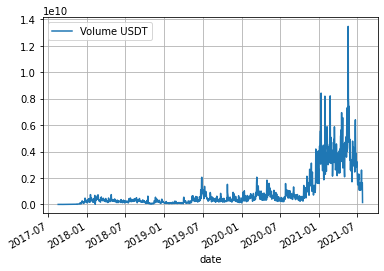

In [12]:
data.plot(y='Volume USDT',
          grid=True);

## RESAMPLING

https://pandas.pydata.org/docs/reference/api/pandas.Series.resample.html

In [13]:
# AGRUPO LA INFORMACION POR SEMANA (ACUMULADO)
data_resampled = data.resample(rule='7D').sum()
data_resampled.head(5)

,open,high,low,close,Volume USDT
date,,,,,
2017-08-17,29145.65,29742.92,27347.81,28789.73,21712573.49
2017-08-24,30332.32,31265.77,29684.54,30773.45,16929014.13
2017-08-31,31562.74,32960.27,29705.99,31627.37,26180859.37
2017-09-07,30355.55,31128.00,28317.89,29680.47,22570128.49
2017-09-14,26193.70,27806.46,24292.72,26149.01,29980042.55


## SHIFTING

https://pandas.pydata.org/docs/reference/api/pandas.Series.shift.html

In [14]:
df_shifting = data.copy()

df_shifting['Shift_1'] = df_shifting['Volume USDT'].shift(1)
df_shifting['Shift_2'] = df_shifting['Volume USDT'].shift(2)
df_shifting['Shift_3'] = df_shifting['Volume USDT'].shift(3)

df_shifting

,open,high,low,close,Volume USDT,Shift_1,Shift_2,Shift_3
date,,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,2.812379e+06,NaN,NaN,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,4.994494e+06,2.812379e+06,NaN,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,1.508239e+06,4.994494e+06,2.812379e+06,NaN
2017-08-20,4139.98,4211.08,4032.62,4086.29,1.915636e+06,1.508239e+06,4.994494e+06,2.812379e+06
2017-08-21,4086.29,4119.62,3911.79,4016.00,2.770592e+06,1.915636e+06,1.508239e+06,4.994494e+06
...,...,...,...,...,...,...,...,...
2021-07-22,32144.51,32591.35,31708.00,32287.83,1.482764e+09,2.603141e+09,1.821231e+09,1.470563e+09
2021-07-23,32287.58,33650.00,31924.32,33634.09,1.631947e+09,1.482764e+09,2.603141e+09,1.821231e+09
2021-07-24,33634.10,34500.00,33401.14,34258.14,1.625046e+09,1.631947e+09,1.482764e+09,2.603141e+09


## ROLLING (*moving average*)

https://pandas.pydata.org/docs/reference/api/pandas.Series.rolling.html

In [15]:
df_rolling = data.copy()

df_rolling['R10'] = df_rolling['Volume USDT'].rolling(window=10).mean()
df_rolling['R50'] = df_rolling['Volume USDT'].rolling(window=50).mean()
df_rolling['R200'] = df_rolling['Volume USDT'].rolling(window=200).mean()

df_rolling.head(15)

,open,high,low,close,Volume USDT,R10,R50,R200
date,,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,2812379.11,NaN,NaN,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,4994493.56,NaN,NaN,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,1508239.39,NaN,NaN,NaN
2017-08-20,4139.98,4211.08,4032.62,4086.29,1915636.35,NaN,NaN,NaN
2017-08-21,4086.29,4119.62,3911.79,4016.00,2770592.06,NaN,NaN,NaN
2017-08-22,4016.00,4104.82,3400.00,4040.00,3648726.50,NaN,NaN,NaN
2017-08-23,4040.00,4265.80,4013.89,4114.01,4062506.52,NaN,NaN,NaN
2017-08-24,4114.01,4371.68,4085.01,4316.01,3225405.80,NaN,NaN,NaN
2017-08-25,4316.01,4453.91,4247.48,4280.68,2440323.79,NaN,NaN,NaN


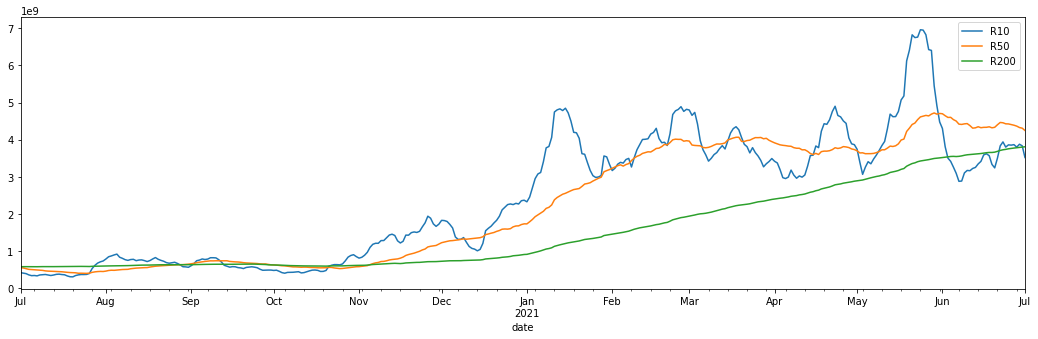

In [16]:
df_rolling['2020-07-01':'2021-07-01'].plot(y=['R10','R50','R200'], figsize=(18,5));

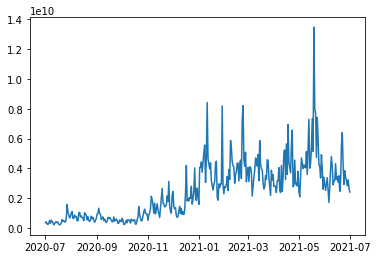

In [17]:
# GRAFICO FECHAS ESPECIFICAS

plt.plot(df_rolling['Volume USDT']['2020-07-01':'2021-07-01']);

## DIFFERENCIES

https://pandas.pydata.org/docs/reference/api/pandas.Series.diff.html

In [18]:
df_diff = data.copy()
df_diff['Diff_1'] = df_diff['Volume USDT'].diff(periods=1)
df_diff['Diff_2'] = df_diff['Volume USDT'].diff(periods=2)
df_diff.head(5)

,open,high,low,close,Volume USDT,Diff_1,Diff_2
date,,,,,,,
2017-08-17,4469.93,4485.39,4200.74,4285.08,2812379.11,NaN,NaN
2017-08-18,4285.08,4371.52,3938.77,4108.37,4994493.56,2182114.45,NaN
2017-08-19,4108.37,4184.69,3850.00,4139.98,1508239.39,-3486254.17,-1304139.72
2017-08-20,4139.98,4211.08,4032.62,4086.29,1915636.35,407396.96,-3078857.21
2017-08-21,4086.29,4119.62,3911.79,4016.00,2770592.06,854955.71,1262352.67


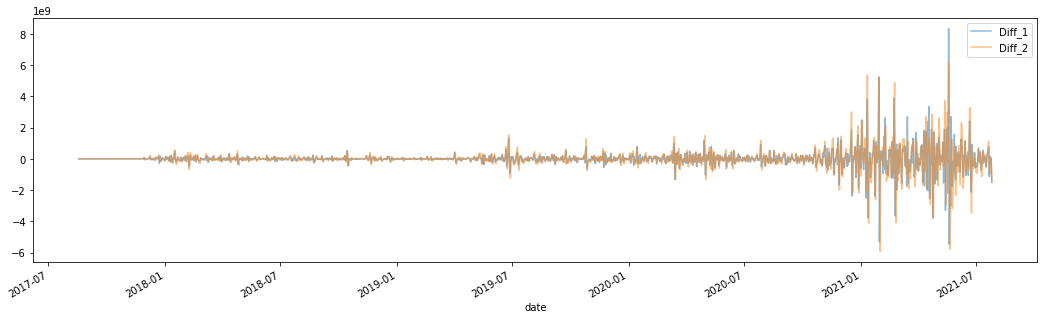

In [19]:
df_diff.plot(y=['Diff_1','Diff_2'],
             alpha=0.5,
             figsize=(18,5));

---

## Imputación mediante interpolación [scipy]

**Ver al final de la notebook un ejemplo real**

https://docs.scipy.org/doc/scipy/reference/interpolate.html

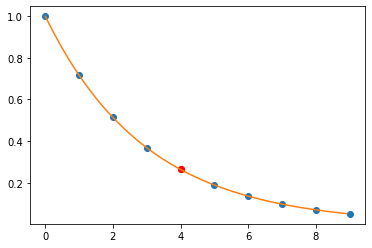

Valor interpolado: 0.2634
Valore real: 0.2636


In [20]:
from scipy import interpolate 

x = np.array([0,1,2,3,5,6,7,8,9])
y = np.exp(-x/3.0)

f = interpolate.interp1d(x, y, kind='cubic')

xnew = np.arange(0, 9, 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x, y, 'o', xnew, ynew, '-')
plt.scatter(4, f(4), 40, 'r')
plt.show()

print(f"Valor interpolado: {f(4):.4}\nValore real: {np.exp(-4/3):.5}")

---

### Imputación mediante interpolación [Pandas]

**Fuente**: https://drnesr.medium.com/filling-gaps-of-a-time-series-using-python-d4bfddd8c460

In [21]:
remote_path = "https://raw.githubusercontent.com/drnesr/WaterConsumption/master/data/SampleData.csv"

df = pd.read_csv(remote_path)
df.head()

,Date,reference,target
0,15-01-2010,12.0,12.0
1,15-02-2010,18.0,18.0
2,15-03-2010,22.0,22.0
3,15-04-2010,26.0,26.0
4,15-05-2010,31.0,NaN


In [22]:
# Converting the column to DateTime format

df.Date = pd.to_datetime(df.Date, format='%d-%m-%Y')
df = df.set_index('Date')
df.head()

,reference,target
Date,,
2010-01-15,12.0,12.0
2010-02-15,18.0,18.0
2010-03-15,22.0,22.0
2010-04-15,26.0,26.0
2010-05-15,31.0,NaN


In [23]:
df = df.assign(missing= np.nan)  # Genero una columna nueva con los datos faltantes

df.missing[df.target.isna()] = df.reference

df.info()  # 21 datos faltantes

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2010-01-15 to 2017-12-15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   reference  96 non-null     float64
 1   target     75 non-null     float64
 2   missing    21 non-null     float64
dtypes: float64(3)
memory usage: 3.0 KB


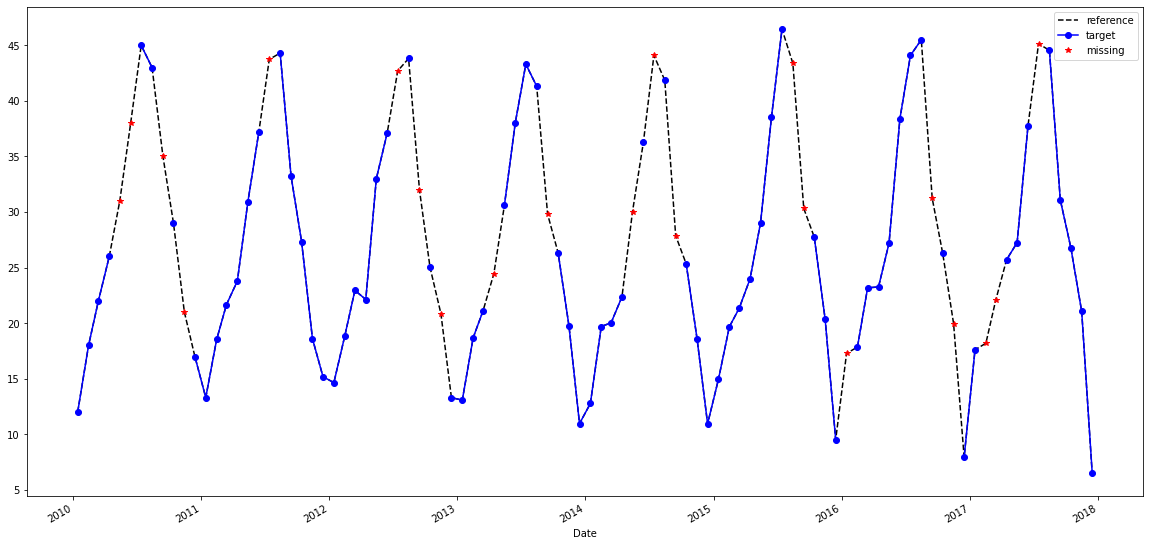

In [24]:
df.plot(style=['k--', 'bo-', 'r*'], figsize=(20, 10));

In [25]:
## OPCIONES DE INTERPOLACION

# Creating a column in the dataframe
# instead of : df['NewCol']=0, we use
# df = df.assign(NewCol=default_value)
# to avoid pandas warning.

df = df.assign(InterpolateLinear=df.target.interpolate(method='linear'))
df = df.assign(InterpolateTime=df.target.interpolate(method='time'))
df = df.assign(InterpolateQuadratic=df.target.interpolate(method='quadratic'))
df = df.assign(InterpolateCubic=df.target.interpolate(method='cubic'))
df = df.assign(InterpolateSLinear=df.target.interpolate(method='slinear'))
df = df.assign(InterpolateAkima=df.target.interpolate(method='akima'))
df = df.assign(InterpolatePoly5=df.target.interpolate(method='polynomial', order=5)) 
df = df.assign(InterpolatePoly7=df.target.interpolate(method='polynomial', order=7))
df = df.assign(InterpolateSpline3=df.target.interpolate(method='spline', order=3))
df = df.assign(InterpolateSpline4=df.target.interpolate(method='spline', order=4))
df = df.assign(InterpolateSpline5=df.target.interpolate(method='spline', order=5))

In [26]:
df

,reference,target,missing,InterpolateLinear,InterpolateTime,InterpolateQuadratic,InterpolateCubic,InterpolateSLinear,InterpolateAkima,InterpolatePoly5,InterpolatePoly7,InterpolateSpline3,InterpolateSpline4,InterpolateSpline5
Date,,,,,,,,,,,,,,
2010-01-15,12.000000,12.000000,NaN,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
2010-02-15,18.000000,18.000000,NaN,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
2010-03-15,22.000000,22.000000,NaN,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
2010-04-15,26.000000,26.000000,NaN,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
2010-05-15,31.000000,NaN,31.0,32.333333,32.263736,32.500323,32.891644,32.263736,31.830800,32.530273,32.278793,33.432723,34.904181,34.330338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,44.550281,44.550281,NaN,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281,44.550281
2017-09-15,31.099088,31.099088,NaN,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088,31.099088
2017-10-15,26.803926,26.803926,NaN,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926,26.803926


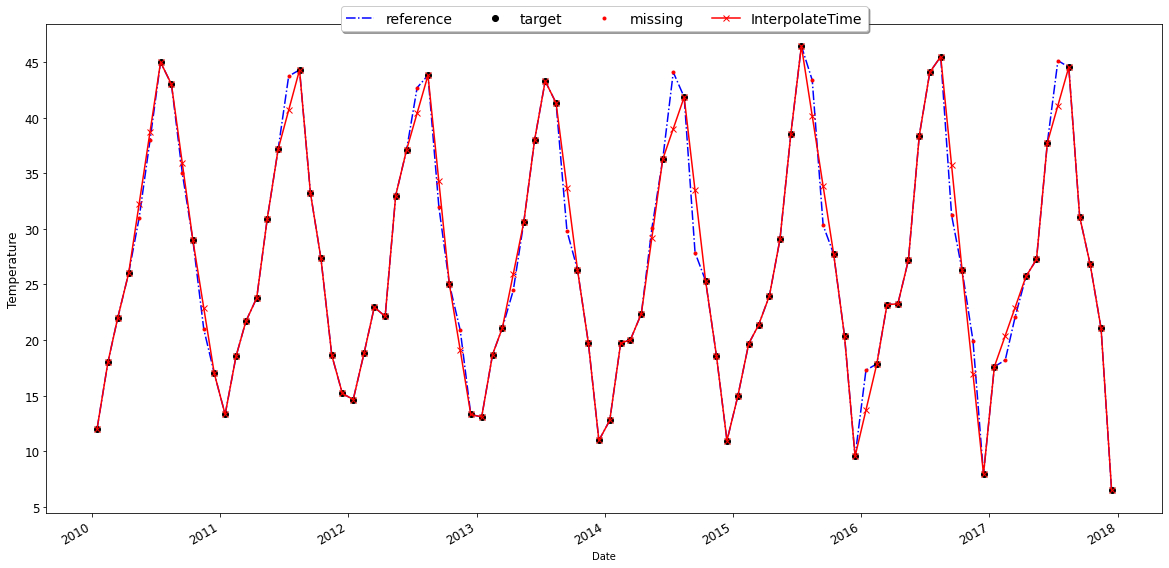

In [27]:
final_df= df[['reference', 'target', 'missing', 'InterpolateTime' ]]
final_df.plot(style=['b-.', 'ko', 'r.', 'rx-'], figsize=(20,10), fontsize=12)
plt.ylabel('Temperature', fontsize=12)

plt.legend(loc='upper center',
           bbox_to_anchor=(0.5, 1.05),
           fancybox=True,
           shadow=True,
           ncol=5,
           prop={'size': 14} );

---

## Statsmodel: seasonal decomposition

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/lib64/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 parse_dates=['date'],
                 index_col='date')

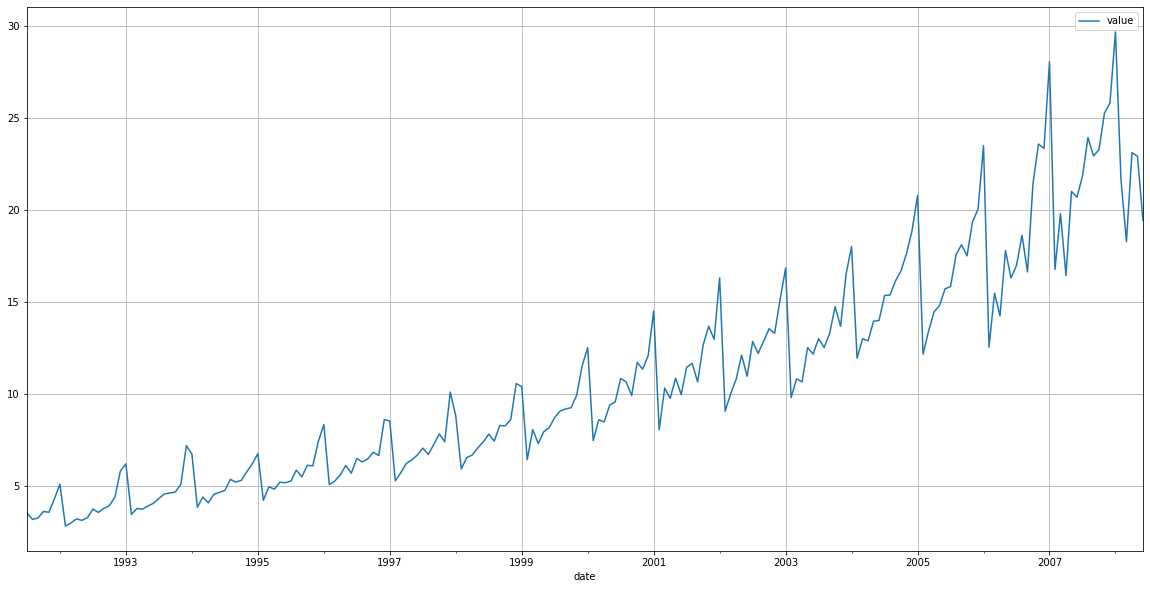

In [30]:
df.plot(grid=True, figsize=(20,10));

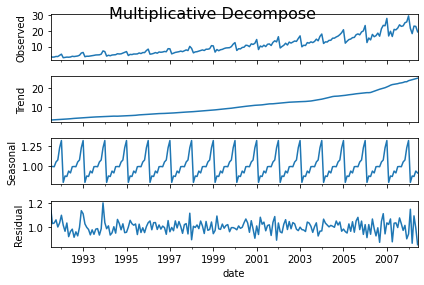

In [31]:
# Multiplicative Decomposition 
result_mul = seasonal_decompose(df['value'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=16)
#result_add.plot().suptitle('Additive Decompose', fontsize=16)
plt.show()

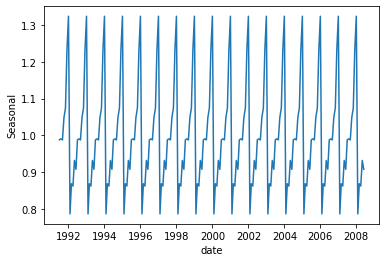

In [32]:
plt.plot(result_mul.seasonal)
plt.xlabel('date')
plt.ylabel('Seasonal');

---

## pmdarima: ARIMA estimators for Python

http://alkaline-ml.com/pmdarima/

In [33]:
# ! pip install pmdarima

---

## sktime: A unified framework for machine learning with time series

https://www.sktime.org/en/latest/

In [34]:
# !pip install sktime[all_extras]